In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\harsh\Downloads\Salary Data.csv")

In [3]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
data.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
data['Age'] = data['Age'].fillna(data['Age'].mean())    
data['Years of Experience'] = data['Years of Experience'].fillna(data['Years of Experience'].mean())  
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())

In [6]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])  
data['Education Level'] = data['Education Level'].fillna(data['Education Level'].mode()[0])  
data['Job Title'] = data['Job Title'].fillna(data['Job Title'].mode()[0]) 


In [7]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
print(data.Age.value_counts())

Age
33.000000    24
29.000000    23
35.000000    22
31.000000    21
44.000000    21
36.000000    20
45.000000    17
34.000000    17
47.000000    15
30.000000    15
38.000000    15
40.000000    13
28.000000    13
39.000000    12
32.000000    12
41.000000    12
43.000000    12
37.000000    12
42.000000    11
46.000000    10
48.000000     9
27.000000     9
50.000000     8
49.000000     8
26.000000     7
51.000000     5
25.000000     4
52.000000     3
37.431635     2
24.000000     1
23.000000     1
53.000000     1
Name: count, dtype: int64


In [9]:
print(data.Gender.value_counts())

Gender
Male      196
Female    179
Name: count, dtype: int64


In [10]:
print(data['Education Level'].value_counts())

Education Level
Bachelor's    226
Master's       98
PhD            51
Name: count, dtype: int64


In [11]:
print(data['Job Title'].value_counts())

Job Title
Director of Marketing             14
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64


In [12]:
print(data['Years of Experience'].value_counts())

Years of Experience
2.000000     31
3.000000     30
8.000000     25
9.000000     22
4.000000     20
7.000000     18
16.000000    18
10.000000    18
5.000000     17
15.000000    16
19.000000    15
12.000000    15
20.000000    13
21.000000    13
14.000000    13
18.000000    13
6.000000     12
1.500000     12
13.000000    11
11.000000    10
22.000000     9
1.000000      7
17.000000     5
25.000000     3
0.000000      3
23.000000     2
10.030831     2
0.500000      1
24.000000     1
Name: count, dtype: int64


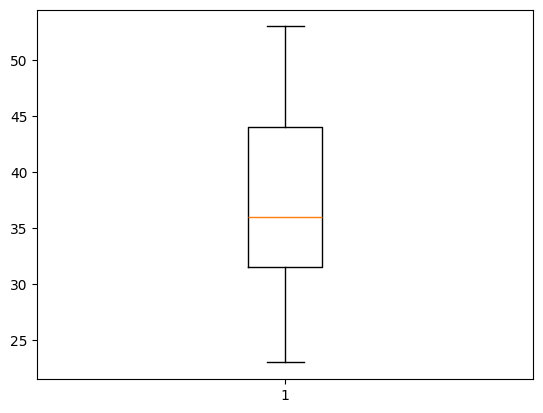

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(data['Age'])
plt.show()

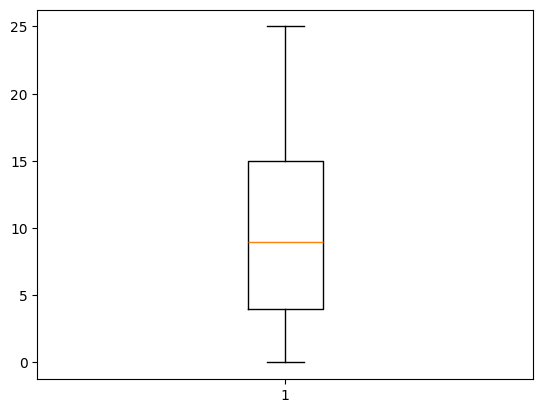

In [14]:
plt.boxplot(data['Years of Experience'])
plt.show()

In [15]:
x = data.drop(columns = ['Salary'])
y = data['Salary']

In [16]:
x

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Director,20.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0
371,43.0,Male,Master's,Director of Operations,19.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0


In [17]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 375, dtype: float64

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd

numerical_cols = ['Age', 'Years of Experience']  
categorical_cols = ['Education Level', 'Gender', 'Job Title'] 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=22),
    "KNN": KNeighborsRegressor(),
    "GradientBoosting": GradientBoostingRegressor(random_state=22)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

    print(f"\n {name} Performance:")
    print(f"  MAE:   {mae:.2f}")
    print(f"  MSE:   {mse:.2f}")
    print(f"  RMSE:  {rmse:.2f}")
    print(f"  R²:    {r2:.4f}")



 LinearRegression Performance:
  MAE:   10545.32
  MSE:   210546274.06
  RMSE:  14510.21
  R²:    0.9018

 RandomForest Performance:
  MAE:   10209.04
  MSE:   211098994.39
  RMSE:  14529.25
  R²:    0.9015

 KNN Performance:
  MAE:   9855.48
  MSE:   178285185.37
  RMSE:  13352.35
  R²:    0.9169

 GradientBoosting Performance:
  MAE:   9380.98
  MSE:   141735789.82
  RMSE:  11905.28
  R²:    0.9339


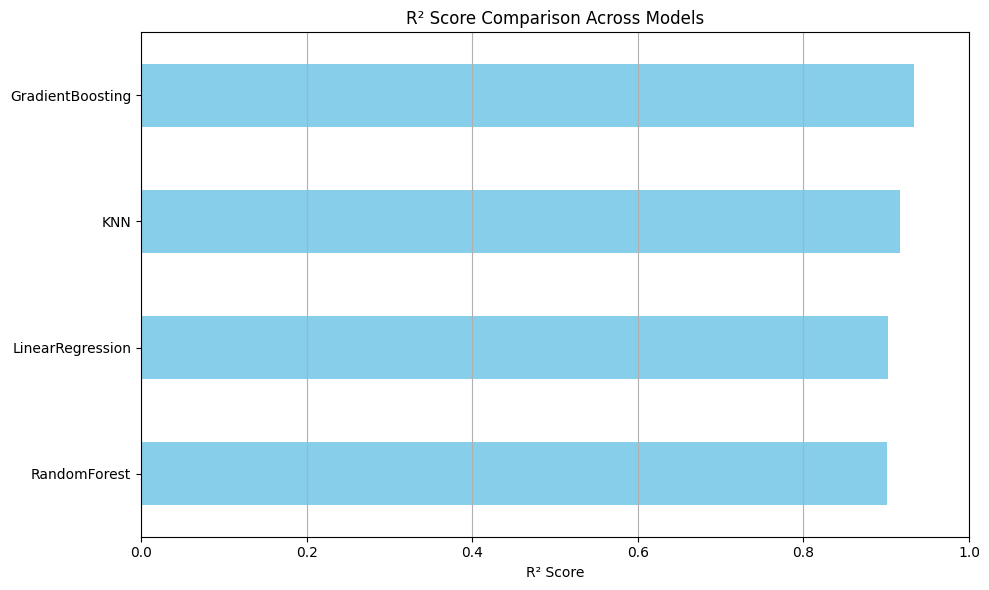

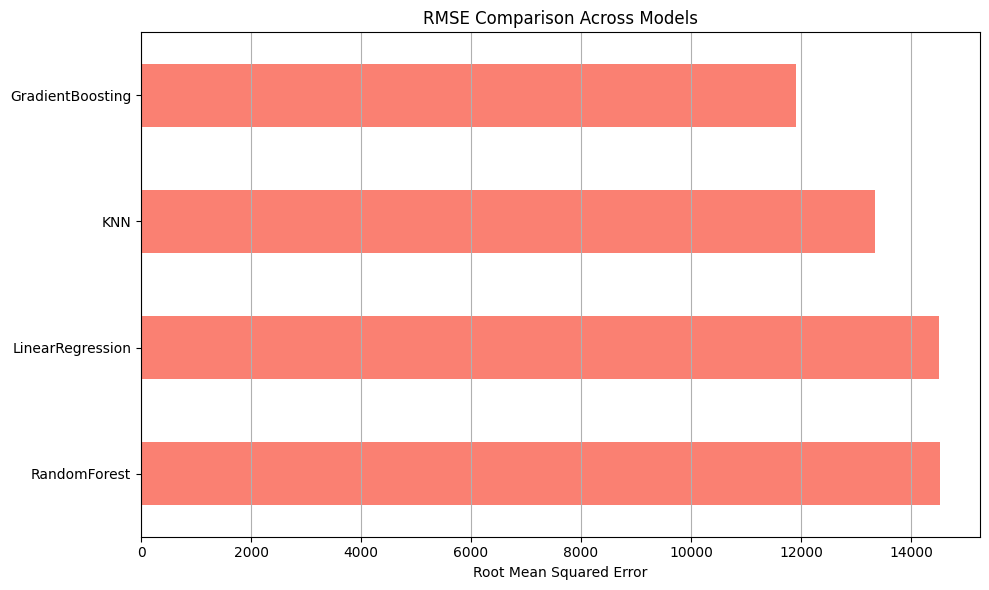

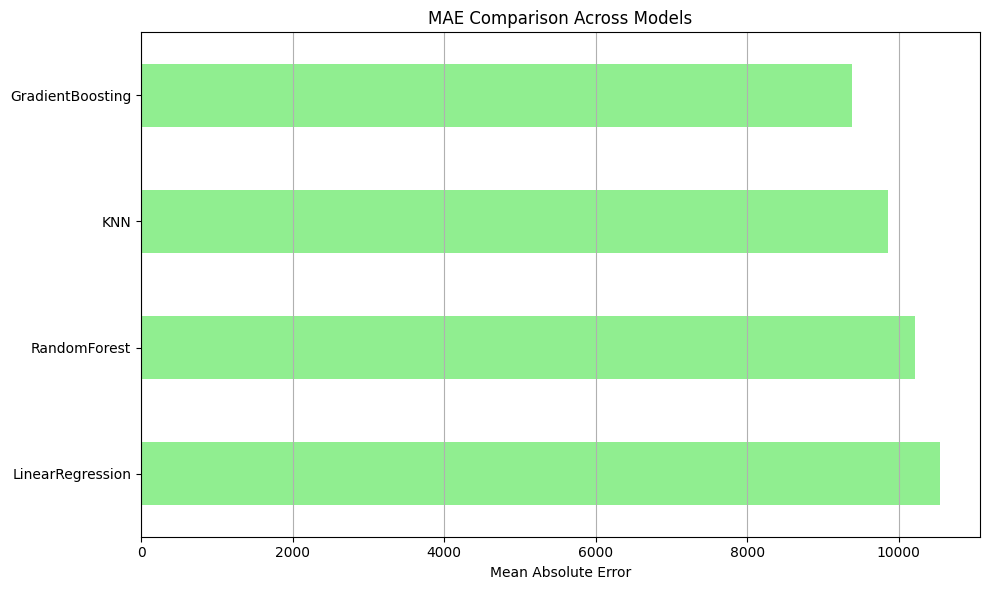

In [19]:
    results_df = pd.DataFrame(results).T

    # Plot R² score
    plt.figure(figsize=(10, 6))
    results_df["R²"].sort_values().plot(kind='barh', color='skyblue')
    plt.title("R² Score Comparison Across Models")
    plt.xlabel("R² Score")
    plt.grid(axis='x')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    # Plot RMSE
    plt.figure(figsize=(10, 6))
    results_df["RMSE"].sort_values(ascending=False).plot(kind='barh', color='salmon')
    plt.title("RMSE Comparison Across Models")
    plt.xlabel("Root Mean Squared Error")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

    # Plot MAE
    plt.figure(figsize=(10, 6))
    results_df["MAE"].sort_values(ascending=False).plot(kind='barh', color='lightgreen')
    plt.title("MAE Comparison Across Models")
    plt.xlabel("Mean Absolute Error")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
import joblib
import numpy as np
import pandas as pd

numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=22),
    "KNN": KNeighborsRegressor(),
    "GradientBoosting": GradientBoostingRegressor(random_state=22)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    r2 = r2_score(y_test, preds)
    results[name] = (r2, pipe)
    print(f"{name}: R² = {r2:.4f}")

best_model_name = max(results, key=lambda k: results[k][0])
best_r2, best_pipeline = results[best_model_name]

print(f"\n✅ Best model: {best_model_name} with R² score {best_r2:.4f}")

joblib.dump(best_pipeline, "best_regressor.pkl")
print("✅ Saved best model as best_regressor.pkl")


LinearRegression: R² = 0.9018
RandomForest: R² = 0.9015
KNN: R² = 0.9169
GradientBoosting: R² = 0.9330

✅ Best model: GradientBoosting with R² score 0.9330
✅ Saved best model as best_regressor.pkl


In [21]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

st.set_page_config(page_title="Salary Predictor", layout="centered")
st.title("💼 Employee Salary Predictor")

model = joblib.load("best_regressor.pkl")

template_columns = ["Age", "Years of Experience", "Gender", "Education Level", "Job Title"]

column_mapping = {
    "age": "Age",
    "years of experience": "Years of Experience",
    "gender": "Gender",
    "education": "Education Level",
    "education level": "Education Level",
    "job title": "Job Title",
    "job": "Job Title"
}

def clean_columns(df):
    df.columns = [column_mapping.get(col.strip().lower(), col.strip()) for col in df.columns]
    return df

st.sidebar.title("Choose Input Type")
input_mode = st.sidebar.radio("Select Input Method:", ["🔢 Manual Entry", "📁 Batch Upload (CSV)"])

# === Manual Input ===
if input_mode == "🔢 Manual Entry":
    st.header("📋 Enter Employee Details")

    try:
        data = pd.read_csv(r"C:\Users\harsh\Downloads\salary_predictor_gui\Salary Data.csv")
        job_titles = sorted(data["Job Title"].dropna().unique().tolist())
    except Exception as e:
        st.warning("⚠️ Could not load Job Titles from CSV. Using fallback list.")
        job_titles = ["Software Engineer", "Data Analyst", "Manager", "Director", "Sales Associate"]

    # UI inputs
    age = st.slider("Age", 18, 65, 30)
    experience = st.slider("Years of Experience", 0, 25, 5)
    education = st.selectbox("Education Level", ["Bachelor's", "Master's", "PhD"])
    job_title = st.selectbox("Job Title", job_titles)
    gender = st.radio("Gender", ["Male", "Female"])

    # Create DataFrame for prediction
    input_df = pd.DataFrame([{
        "Age": age,
        "Years of Experience": experience,
        "Gender": gender,
        "Education Level": education,
        "Job Title": job_title
    }])

    if st.button("Predict Salary"):
        prediction = model.predict(input_df)[0]
        st.success(f"💰 Estimated Salary: ₹{prediction:,.2f}")

# === Batch Upload ===
else:
    st.header("📁 Upload CSV for Batch Salary Prediction")

    uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])

    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        df = clean_columns(df)

        st.write("📄 Uploaded Data Preview:")
        st.dataframe(df.head())

        # Check for required columns
        missing_cols = set(template_columns) - set(df.columns)

        if missing_cols:
            st.error(f"⚠️ Prediction failed: columns are missing: {missing_cols}")
            st.info("Check if the uploaded CSV matches the expected format used during training.")
        else:
            try:
                predictions = model.predict(df)
                df["Predicted Salary"] = predictions
                st.success("✅ Salary prediction complete!")
                st.dataframe(df)

                # CSV download
                csv = df.to_csv(index=False).encode('utf-8')
                st.download_button("📥 Download Results", csv, "predicted_salaries.csv", "text/csv")

            except Exception as e:
                st.error(f"⚠️ Prediction failed: {e}")
                st.info("Ensure data is clean and consistent with the training set.")


Overwriting app.py


In [ ]:
!streamlit run app.py